In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
path = '/content/gdrive/MyDrive/AI/Copy of data.csv'

from numpy import genfromtxt

data = genfromtxt(path, delimiter=',')

In [18]:
import numpy as np
import random
center = []
for i in range(6):
  rand = random.sample(range(-10000,10000),2)
  center.append(rand)
print(center)

[[5124, 1735], [-4882, -4622], [5290, 4354], [8188, 6597], [1014, -1129], [-6824, -7456]]


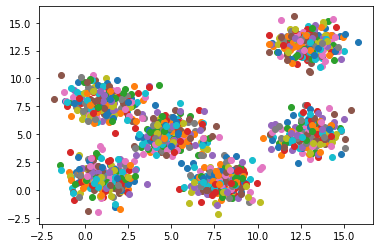

In [19]:
import matplotlib.pyplot as plt

for i in range(len(data)):
  plt.scatter(data[i][0], data[i][1])
# for c in center:
#   plt.scatter(c[0], c[1], s=30,color = "black")
plt.show()

In [20]:
cluster = [[] for i in range(6)]
itr =0
while True:
  temp_cluster = [[] for i in range(6)]
  index = 0

  for S in data:
    count = 0
    minDist = 9999
    minIndx = -1
    for C in center:
      dist = np.linalg.norm(S-C)

      if dist < minDist:
        minDist = dist
        minIndx = count
      count +=1
    temp_cluster[minIndx].append(index)
    index +=1

  for X in range(len(temp_cluster)):
    avg = [0,0]

    for x in temp_cluster[X]:
      avg += data[x]/ len(temp_cluster[X])
    center[X] = avg
  itr += 1
  # print(temp_cluster)

  if itr >1:
    shift = 0
    for i in range(len(data)):
      cIndx = -1
      tmpIndx = -1
      for I,a in enumerate(temp_cluster):
        if i in a:
          tmpIndx = I
      for I,b in enumerate(cluster):
        if i in b:
          cIndx = I
      if cIndx != tmpIndx:
        shift +=1
    if shift < 10:
      cluster = temp_cluster
      break
  cluster = temp_cluster

print(itr)

21


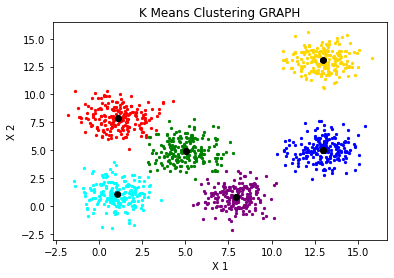

In [21]:
import matplotlib.pyplot as plt
 
for i in range(len(cluster)):
  color = ["red","blue","green","purple","gold","cyan"]
  for x in cluster[i]:
    plt.scatter(data[x,0], data[x,1], s=5,color = color[i])
  for x in center:
    plt.scatter(x[0], x[1], s=30,color = "black")
    
plt.xlabel('X 1')
plt.ylabel('X 2')
plt.title('K Means Clustering GRAPH')
plt.show()